<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-&amp;-Model-Load" data-toc-modified-id="Data-&amp;-Model-Load-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data &amp; Model Load</a></span></li><li><span><a href="#Data-Load" data-toc-modified-id="Data-Load-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Load</a></span></li><li><span><a href="#Devolution" data-toc-modified-id="Devolution-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Devolution</a></span><ul class="toc-item"><li><span><a href="#MNIST" data-toc-modified-id="MNIST-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>MNIST</a></span></li><li><span><a href="#CIFAR10" data-toc-modified-id="CIFAR10-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>CIFAR10</a></span><ul class="toc-item"><li><span><a href="#Max-Activation-=-False" data-toc-modified-id="Max-Activation-=-False-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Max Activation = False</a></span></li><li><span><a href="#Max-Activation-=-True" data-toc-modified-id="Max-Activation-=-True-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Max Activation = True</a></span></li></ul></li><li><span><a href="#SmoothGrad" data-toc-modified-id="SmoothGrad-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>SmoothGrad</a></span><ul class="toc-item"><li><span><a href="#MNIST" data-toc-modified-id="MNIST-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>MNIST</a></span></li><li><span><a href="#CIFAR10" data-toc-modified-id="CIFAR10-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>CIFAR10</a></span></li></ul></li></ul></li></ul></div>

**Reference**
- https://github.com/huybery/VisualizingCNN

In [1]:
import torch
from torch.autograd import Variable

import numpy as np
import sys
import os 
from functools import partial

sys.path.append('../code')
from model import SimpleCNN, SimpleCNNDeconv
from dataload import mnist_load, cifar10_load
from deconvnet import DeconvNet
from utils import get_example_params

import matplotlib.pyplot as plt

print('Model Checkpoints')
print(os.listdir('../checkpoint'))
print()
print('Model Logs')
print(os.listdir('../logs'))

# config
image_save = False

Model Checkpoints
['simple_cnn_cifar10.pth', 'simple_cnn_mnist.pth']

Model Logs
['simple_cnn_cifar10_logs.txt', 'simple_cnn_mnist_logs.txt']


# Data & Model Load

**MNIST**

In [2]:
original_images_mnist, pre_images_mnist, mnist_classes, mnist_model = get_example_params('mnist')
mnist_model_deconv = SimpleCNNDeconv('mnist')

Data Complete
Model Complete


**CIFAR10**

In [3]:
original_images_cifar10, pre_images_cifar10, cifar10_classes, cifar10_model = get_example_params('cifar10')
cifar10_model_deconv = SimpleCNNDeconv('cifar10')

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Data Complete
Model Complete


# Data Load

# Devolution

In [31]:
mnist_deconvnet = DeconvNet(mnist_model, mnist_model_deconv)
cifar10_deconvnet = DeconvNet(cifar10_model, cifar10_model_deconv)

In [5]:
# conv layer index
conv_layer_idx = [0,4,8]

## MNIST

In [25]:
# output list
nb_class = 10
nb_layer = len(conv_layer_idx)
outputs = np.zeros((nb_class*nb_layer,) + original_images_mnist.shape[1:]) # (nb_class * nb_conv_layer, image size)
outputs_max = np.zeros((nb_class*nb_layer,) + original_images_mnist.shape[1:]) # (nb_class * nb_conv_layer, image size)
preds = np.zeros(10)
probs = np.zeros(10)
cnt = 0
    
for i in range(nb_class):    
    for conv_idx in conv_layer_idx:
        pre_image = pre_images_mnist[i].unsqueeze(0)
        output, prob, pred = mnist_deconvnet.generate_image(pre_image, conv_idx, False)
        output_max, _, _ = mnist_deconvnet.generate_image(pre_image, conv_idx, True)
        outputs[cnt] = output
        outputs_max[cnt] = output_max
        cnt += 1
    preds[i] = pred
    probs[i] = prob

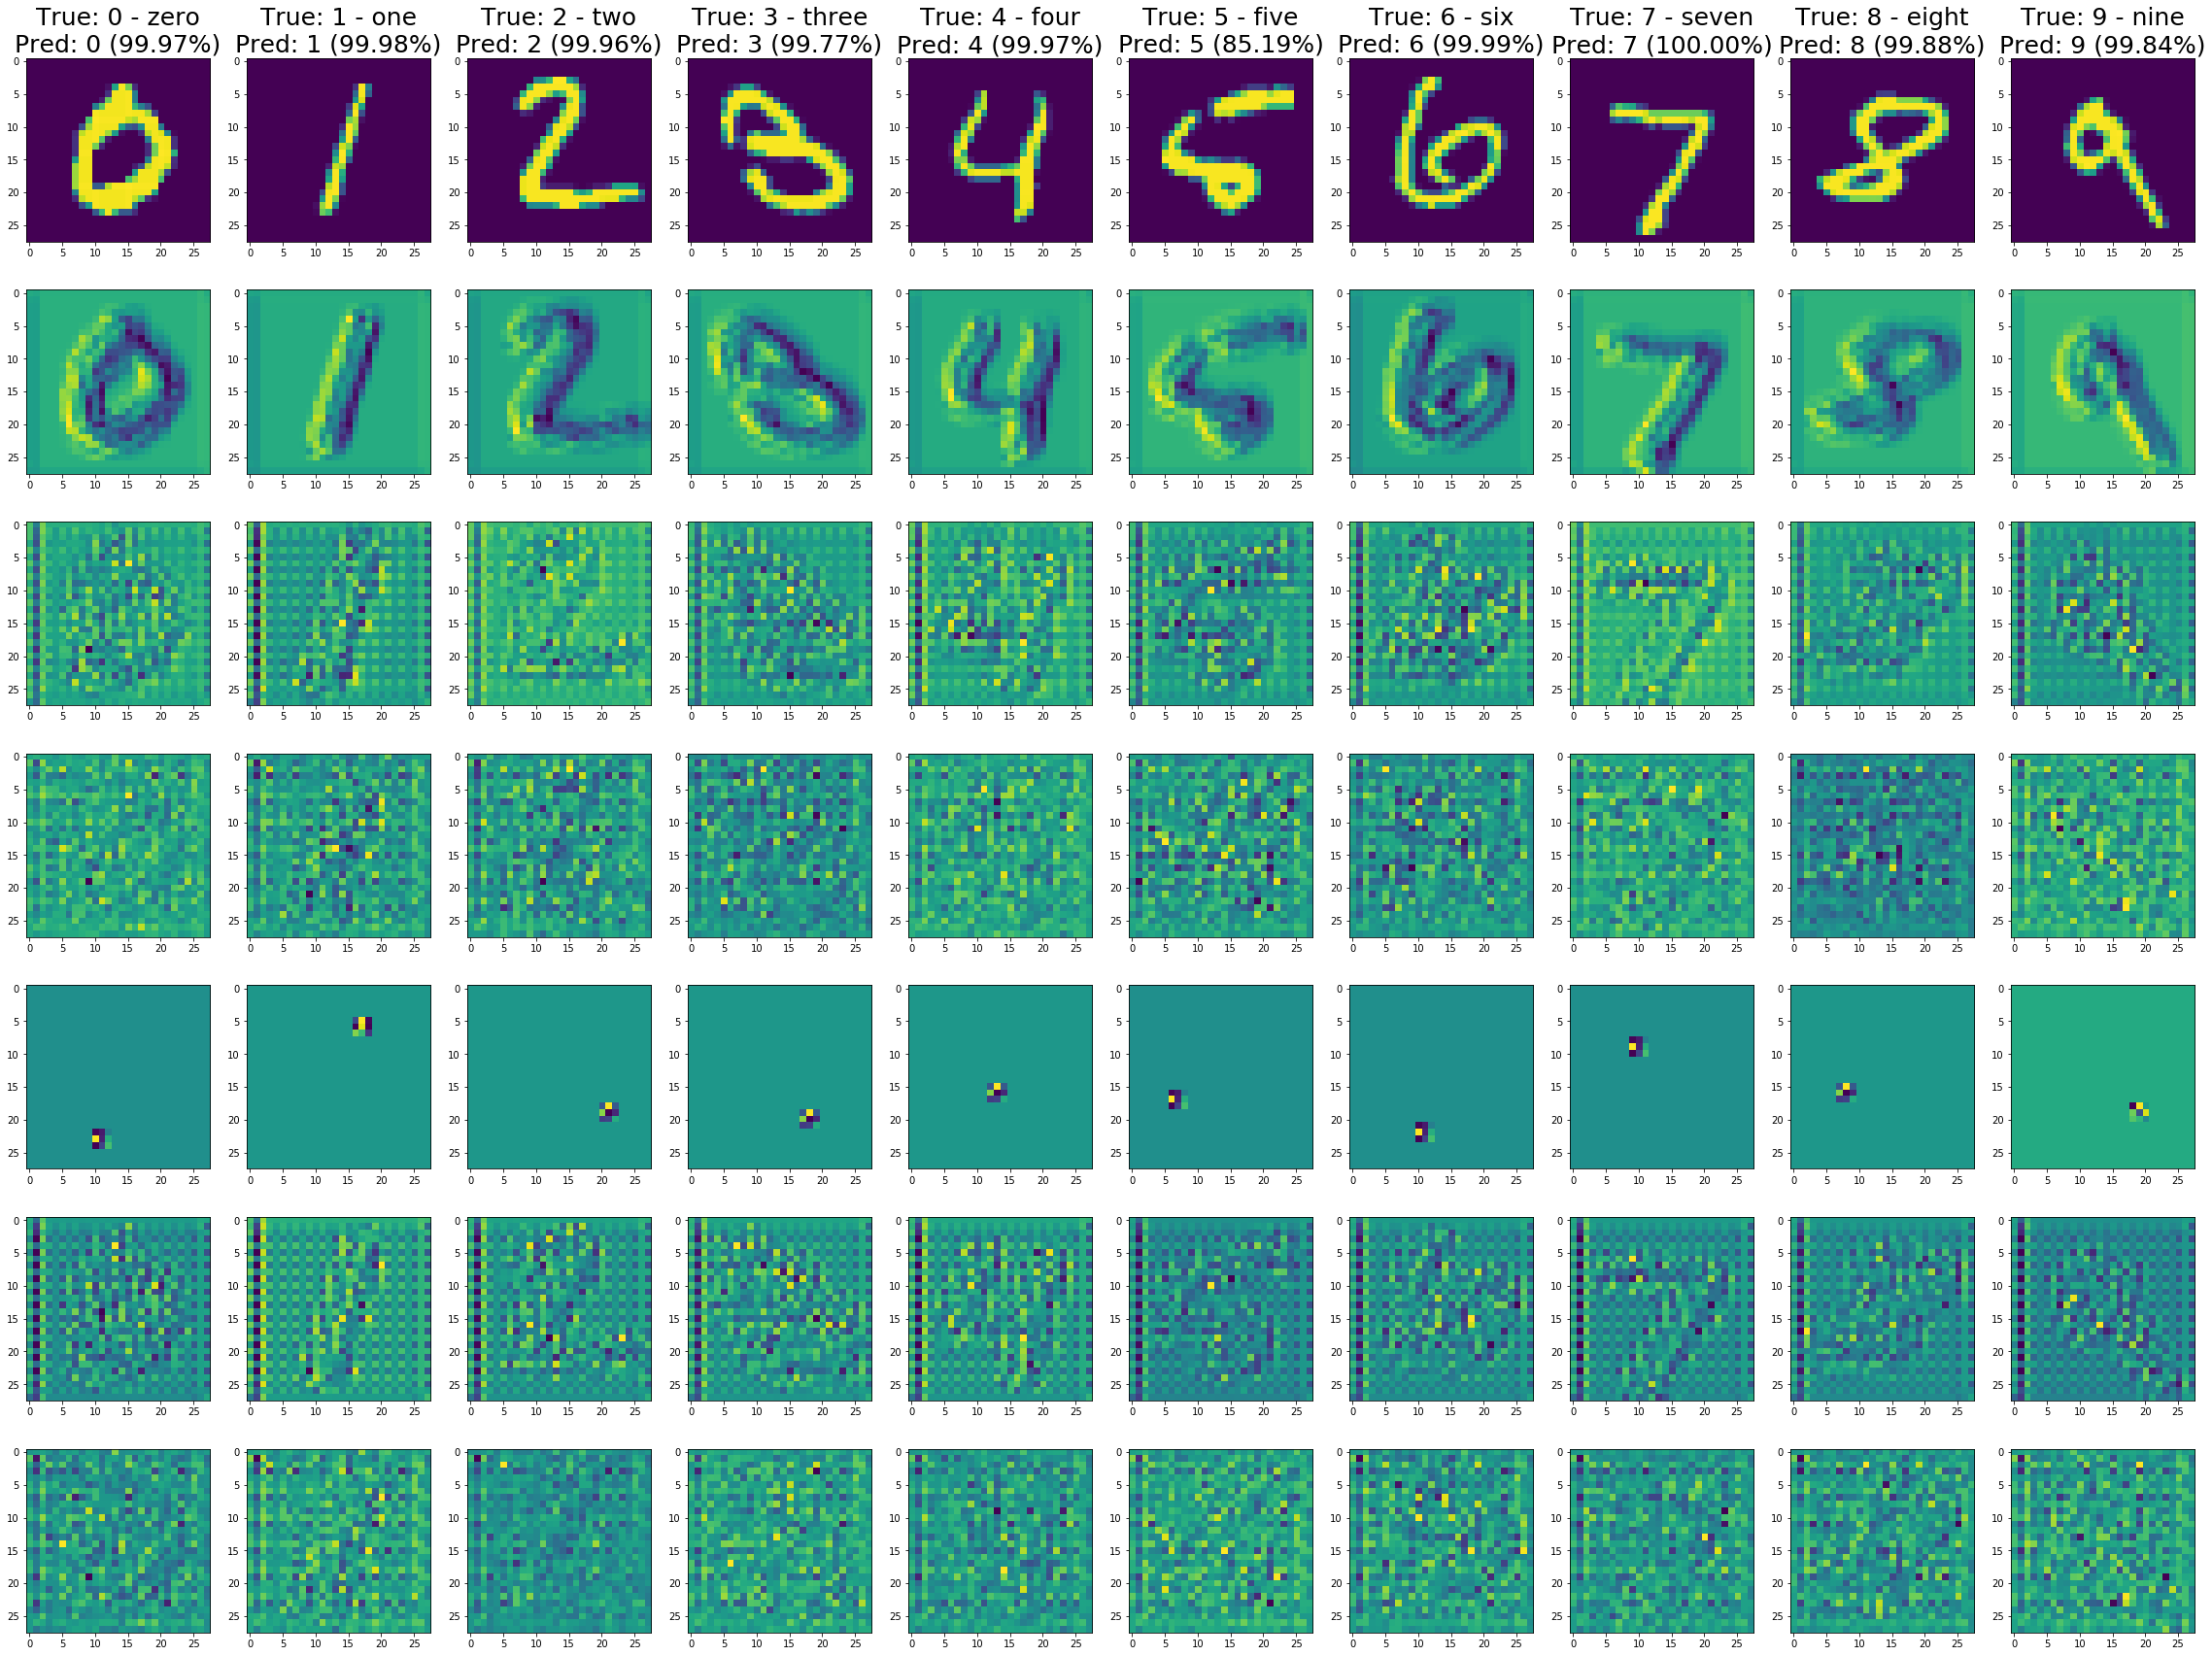

In [26]:
f, ax = plt.subplots(7, 10, figsize=(40,30))
for i in range(10):
    # Raw images
    ax[0, i].imshow(original_images_mnist[i].squeeze())
    ax[0, i].set_title('True: {0:}\nPred: {1:} ({2:.2%})'.format(mnist_classes[i], int(preds[i]), probs[i]), size=25)
    
    # Deconv images
    ax[1, i].imshow(outputs[0+(i*3)].reshape((28,28)))
    ax[2, i].imshow(outputs[1+(i*3)].reshape((28,28)))
    ax[3, i].imshow(outputs[2+(i*3)].reshape((28,28)))
    
    # Deconv images (Max Activation)
    ax[4, i].imshow(outputs_max[0+(i*3)].reshape((28,28)))
    ax[5, i].imshow(outputs_max[1+(i*3)].reshape((28,28)))
    ax[6, i].imshow(outputs_max[2+(i*3)].reshape((28,28)))

if image_save:
    plt.tight_layout()
    plt.savefig('../images/results/deconv_mnist_result.jpg', dpi=500)
    plt.show()

## CIFAR10

In [39]:
# output list
nb_class = 10
nb_layer = len(conv_layer_idx)
outputs = np.zeros((nb_class*nb_layer,) + original_images_cifar10.shape[1:]) # (nb_class * nb_conv_layer, image size)
outputs_max = np.zeros((nb_class*nb_layer,) + original_images_cifar10.shape[1:]) # (nb_class * nb_conv_layer, image size)
preds = np.zeros(10)
probs = np.zeros(10)
cnt = 0
    
for i in range(nb_class):    
    for conv_idx in conv_layer_idx:
        pre_image = pre_images_cifar10[i].unsqueeze(0)
        output, prob, pred = cifar10_deconvnet.generate_image(pre_image, conv_idx, False)
        output_max, _, _ = cifar10_deconvnet.generate_image(pre_image, conv_idx, True)
        outputs[cnt] = output
        outputs_max[cnt] = output_max
        cnt += 1
    preds[i] = pred
    probs[i] = prob

In [40]:
# TODO : 왜 함수안에서 바꿔주는데 mnist는 되고 cifar10은 안되지?
outputs = outputs.astype(np.uint8)
outputs_max = outputs_max.astype(np.uint8)

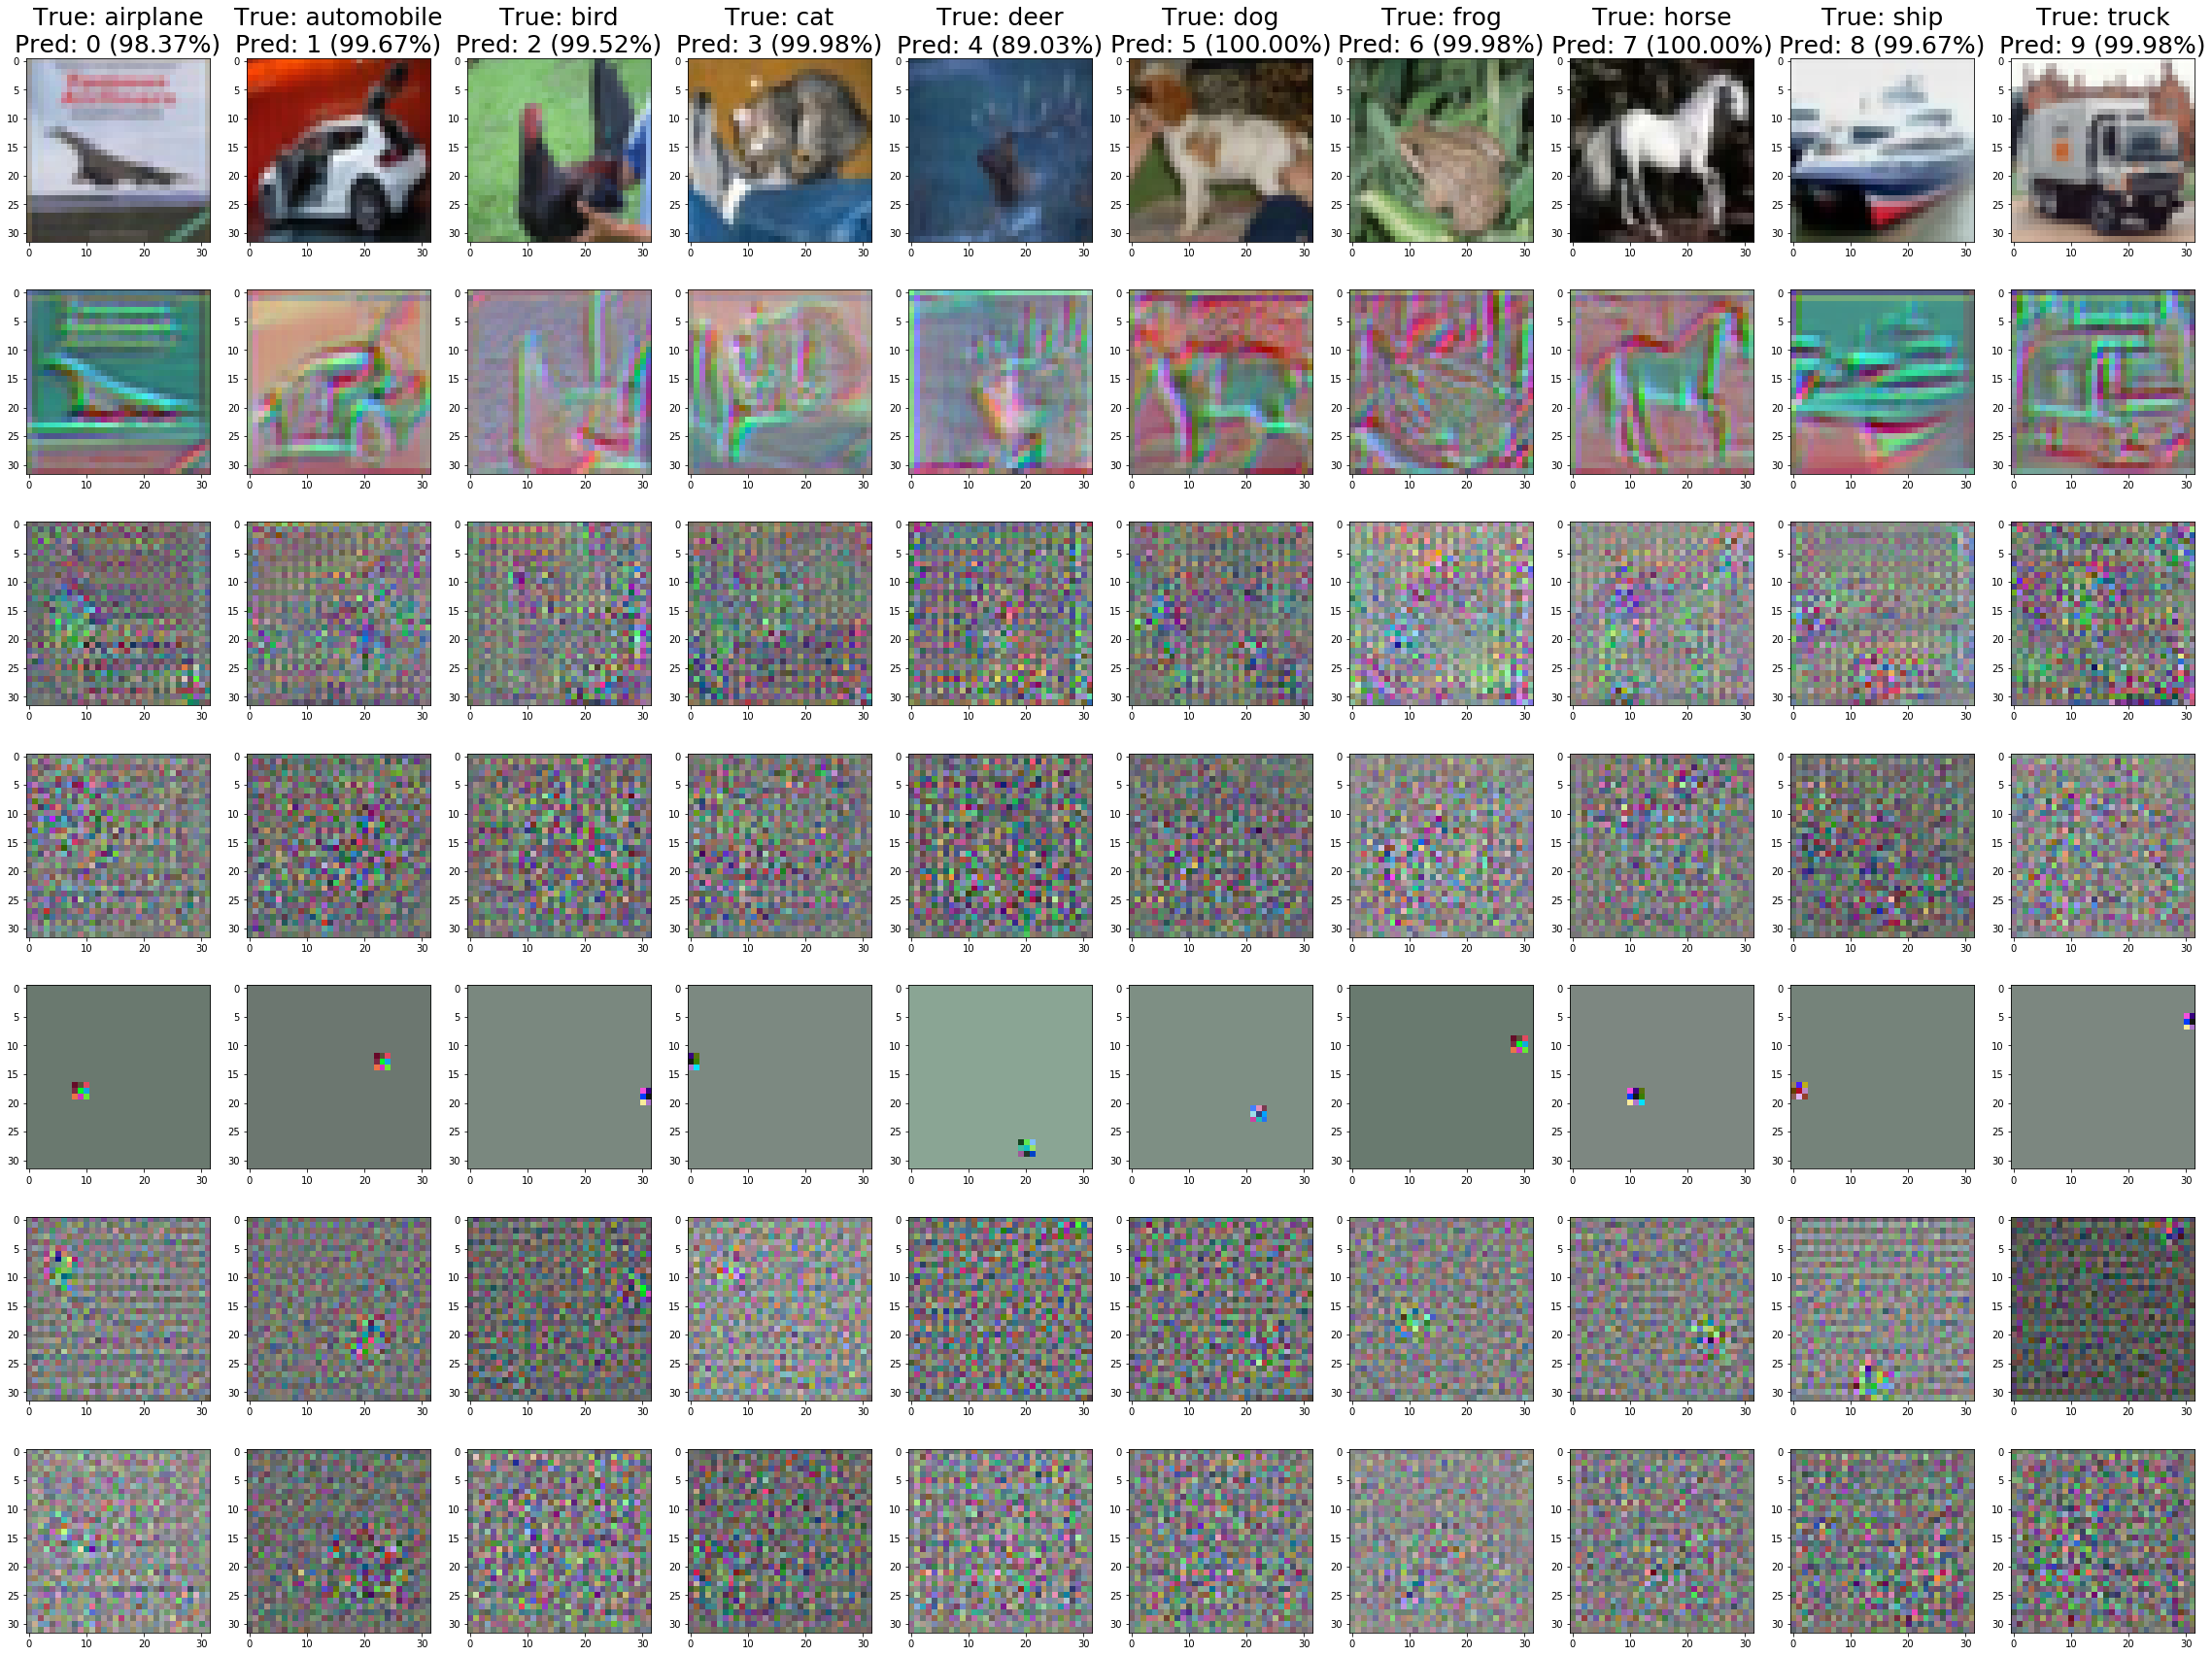

In [41]:
f, ax = plt.subplots(7, 10, figsize=(40,30))
for i in range(10):
    # Raw images
    ax[0, i].imshow(original_images_cifar10[i].squeeze())
    ax[0, i].set_title('True: {0:}\nPred: {1:} ({2:.2%})'.format(cifar10_classes[i], int(preds[i]), probs[i]), size=25)
    
    # Deconv images
    ax[1, i].imshow(outputs[0+(i*3)])
    ax[2, i].imshow(outputs[1+(i*3)])
    ax[3, i].imshow(outputs[2+(i*3)])
    
    # Deconv images (Max Activation)
    ax[4, i].imshow(outputs_max[0+(i*3)])
    ax[5, i].imshow(outputs_max[1+(i*3)])
    ax[6, i].imshow(outputs_max[2+(i*3)])

if image_save:
    plt.tight_layout()
    plt.savefig('../images/results/deconv_cifar10_result.jpg', dpi=500)
    plt.show()

## SmoothGrad

### MNIST

In [76]:
# select image
first_idx_by_class = [torch.where(mnist_test.targets==i)[0][0].item() for i in range(10)]
imgs = mnist_test.data.numpy()[first_idx_by_class]
true_classes = mnist_test.targets.numpy()[first_idx_by_class]

# conv layer index
conv_layer_idx = [0,4,8]

In [77]:
# output list
nb_class = 10
nb_layer = len(conv_layer_idx)
outputs = np.zeros((nb_class*nb_layer,) + imgs.shape[1:] + (1,)) # (nb_class * nb_conv_layer, image size)
cnt = 0

# set parameter
param_n = 50
param_sigma_multiplier = 10

# pred image
model_mnist.eval()

for img in imgs:
    # transform image
    trans_img = mnist_transform(img)
    trans_img = trans_img.unsqueeze_(0)
    
    # normal distribution parameters
    mean = 0
    sigma = param_sigma_multiplier / (torch.max(trans_img) - torch.min(trans_img)).item()

    # Generate noise
    noise = Variable(trans_img.data.new(trans_img.size()).normal_(mean, sigma**2))
    # Add noise to the image
    noisy_img = trans_img + noise

    for conv_idx in conv_layer_idx:
        # make smooth_grad array
        smooth_grad = np.zeros(((param_n,) + img.shape + (1,)))        
        
        for x in range(param_n):
            # predict
            pred = model_mnist(noisy_img).detach()
            
            # generate feature map
            output = deconv_visualization(model_mnist, 
                                          mnist_model_deconv, 
                                          conv_idx,
                                          False)
            smooth_grad[x] = output
        
        smooth_grad / param_n
            
        outputs[cnt] = output
        cnt += 1

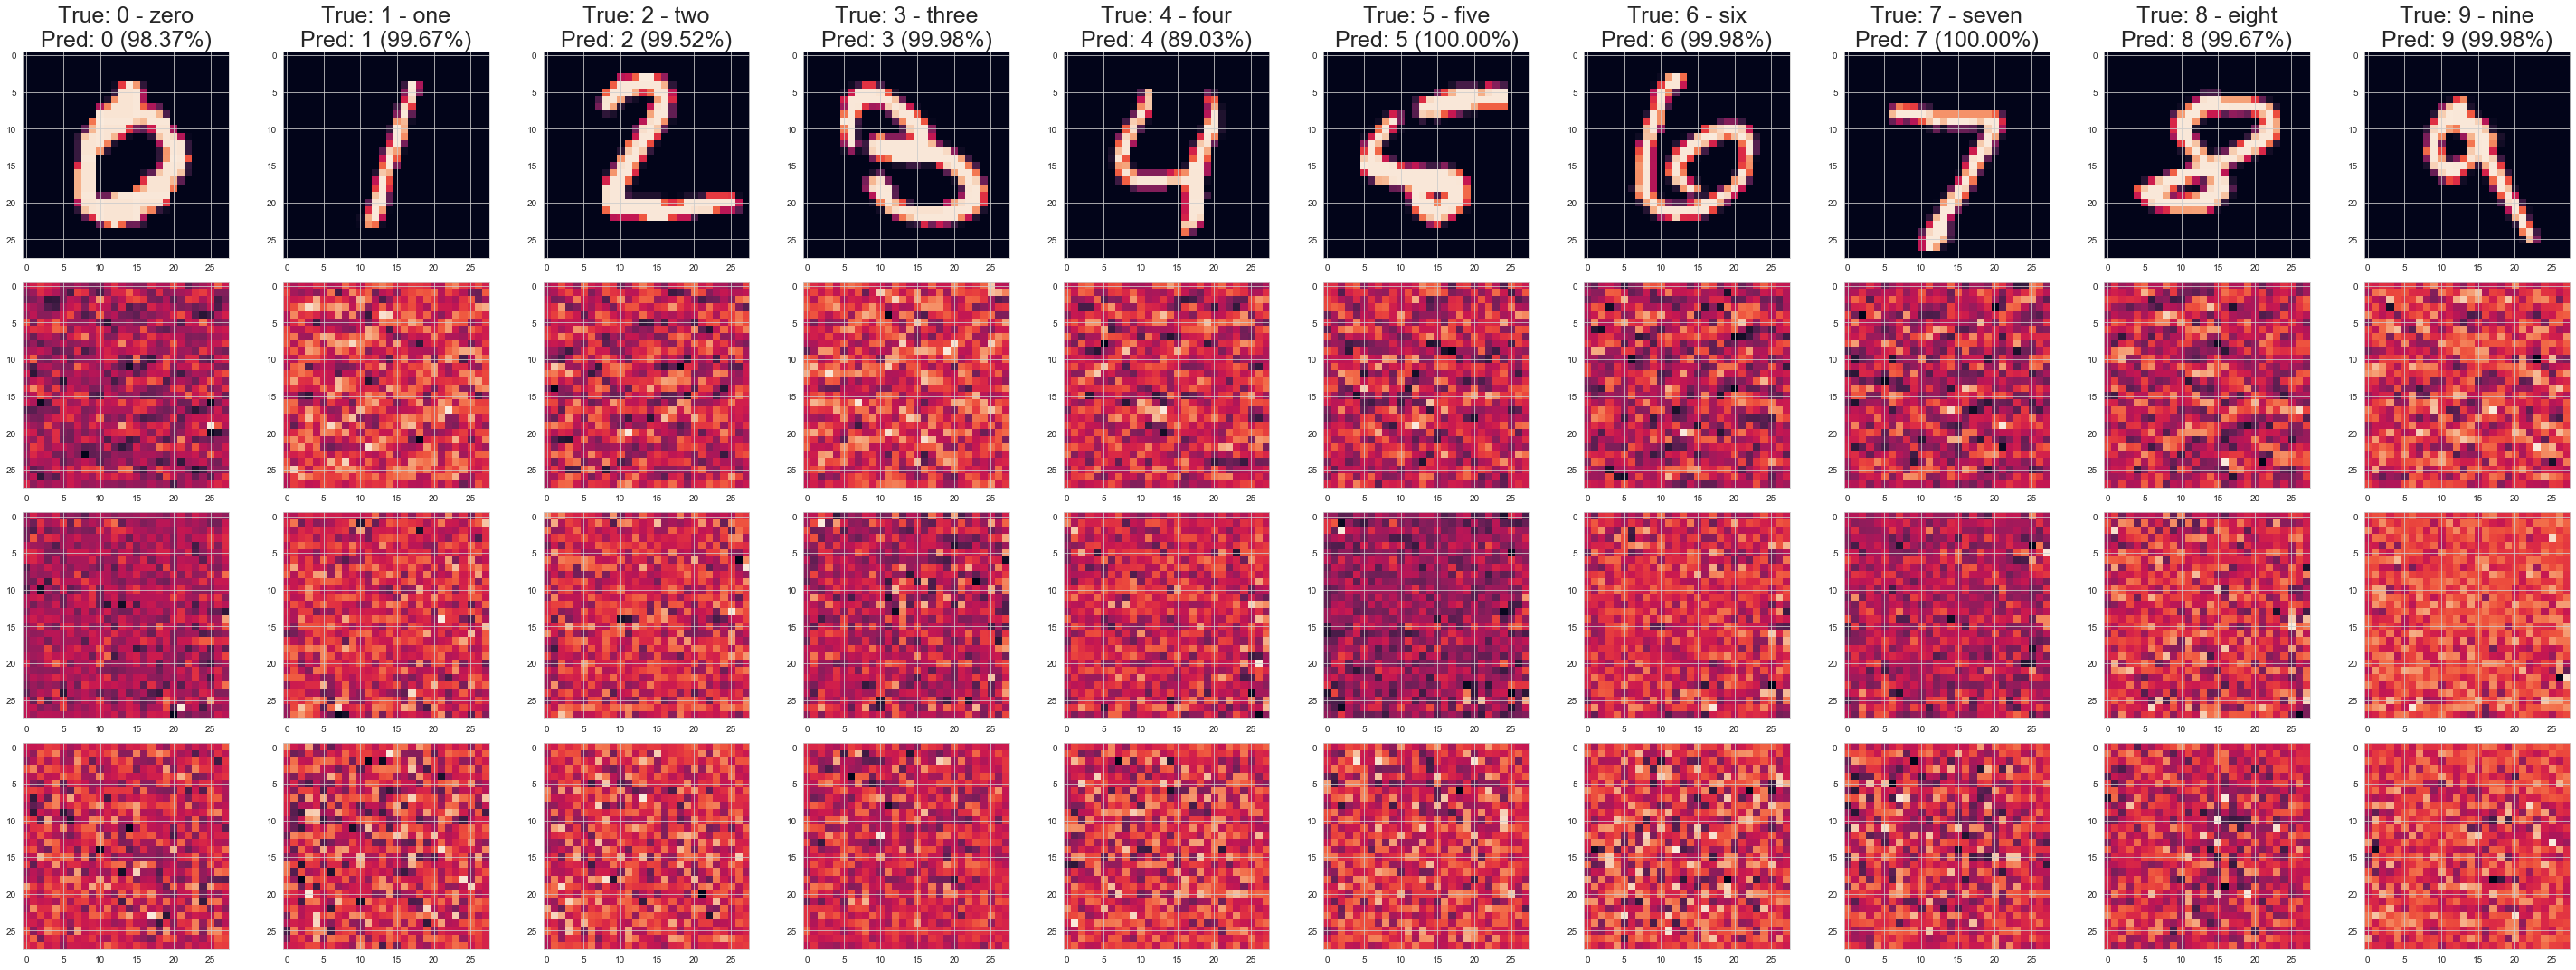

In [78]:
f, ax = plt.subplots(4, 10, figsize=(40,15))
for i in range(10):
    # Raw images
    ax[0, i].imshow(imgs[i])
    ax[0, i].set_title('True: {0:}\nPred: {1:} ({2:.2%})'.format(mnist_idx2class[i], int(preds[i]), probs[i]), size=25)
    
    # Deconv images
    ax[1, i].imshow(outputs[0+(i*3)].reshape((28,28)))
    ax[2, i].imshow(outputs[1+(i*3)].reshape((28,28)))
    ax[3, i].imshow(outputs[2+(i*3)].reshape((28,28)))

if image_save:
    plt.tight_layout()
    plt.savefig('../images/results/deconv_mnist_result_SmoothGrad(n{},sigma{}).jpg'.format(param_n, param_sigma_multiplier), dpi=500)
    plt.show()

### CIFAR10

In [79]:
# select image
first_idx_by_class = [np.where(np.array(cifar10_test.targets)==i)[0][0] for i in range(10)]
imgs = cifar10_test.data[first_idx_by_class]
true_classes = np.array(cifar10_test.targets)[first_idx_by_class]

# conv layer index
conv_layer_idx = [0,4,8]

In [80]:
# output list
nb_class = 10
nb_layer = len(conv_layer_idx)
outputs = np.zeros((nb_class*nb_layer,) + imgs.shape[1:]) # (nb_class * nb_conv_layer, image size)
cnt = 0

# set parameter
param_n = 50
param_sigma_multiplier = 10

# pred image
model_cifar10.eval()

for img in imgs:
    # transform image
    trans_img = cifar10_transform(img)
    trans_img = trans_img.unsqueeze_(0)
    
    # normal distribution parameters
    mean = 0
    sigma = param_sigma_multiplier / (torch.max(trans_img) - torch.min(trans_img)).item()

    # Generate noise
    noise = Variable(trans_img.data.new(trans_img.size()).normal_(mean, sigma**2))
    # Add noise to the image
    noisy_img = trans_img + noise

    for conv_idx in conv_layer_idx:
        # make smooth_grad array
        smooth_grad = np.zeros(((param_n,) + img.shape))        
        
        for x in range(param_n):
            # predict
            pred = model_cifar10(noisy_img).detach()
            
            # generate feature map
            output = deconv_visualization(model_cifar10, 
                                          cifar10_model_deconv, 
                                          conv_idx,
                                          False)
            smooth_grad[x] = output
        
        smooth_grad / param_n
            
        outputs[cnt] = output
        cnt += 1

In [81]:
outputs = outputs.astype(np.uint8)

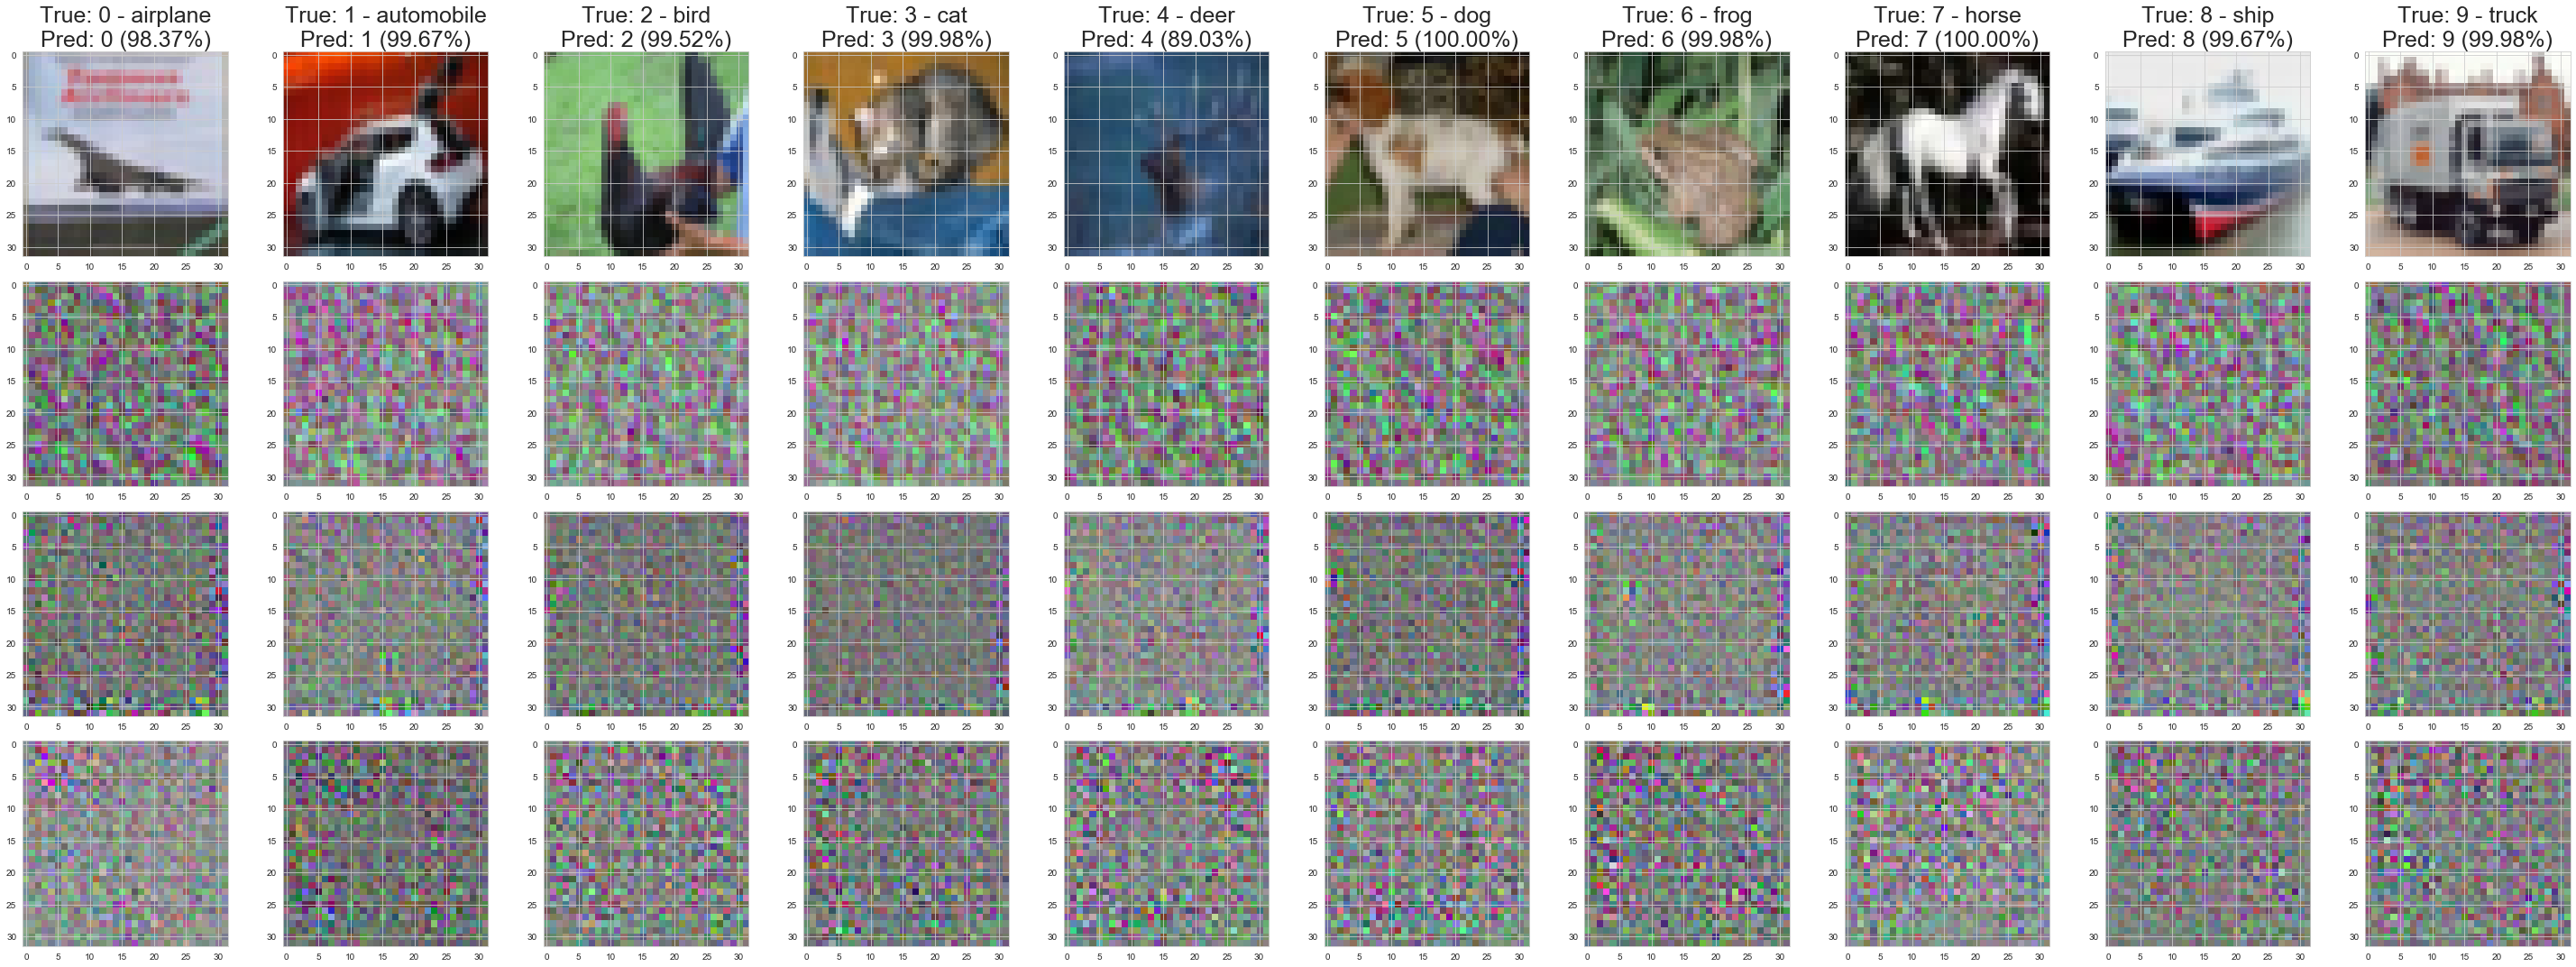

In [82]:
f, ax = plt.subplots(4, 10, figsize=(40,15))
for i in range(10):
    # Raw images
    ax[0, i].imshow(imgs[i])
    ax[0, i].set_title('True: {0:} - {1:}\nPred: {2:} ({3:.2%})'.format(i, cifar10_idx2class[i], int(preds[i]), probs[i]), size=25)
    
    # Deconv images
    ax[1, i].imshow(outputs[0+(i*3)])
    ax[2, i].imshow(outputs[1+(i*3)])
    ax[3, i].imshow(outputs[2+(i*3)])

if image_save:
    plt.tight_layout()
    plt.savefig('../images/results/deconv_cifar_result_SmoothGrad(n{},sigma{}).jpg'.format(param_n, param_sigma_multiplier), dpi=500)
    plt.show()